### 사진파일 불러오기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_start = cv2.imread(my_image_path)
img_start = cv2.resize(img_start, (640, 360))
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

### 얼굴인식박스 만들기

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
bounding_box = detector_hog(img_rgb, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

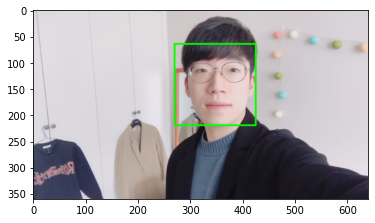

In [3]:
for dlib_rectangle in bounding_box:
    l = dlib_rectangle.left()
    t = dlib_rectangle.top()
    r = dlib_rectangle.right()
    b = dlib_rectangle.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

### 랜드마크 모델 불러오기

In [4]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [5]:
list_landmarks = []

for dlib_rectangle in bounding_box:
    points = landmark_predictor(img_rgb, dlib_rectangle)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


### 랜드마크 적용하기

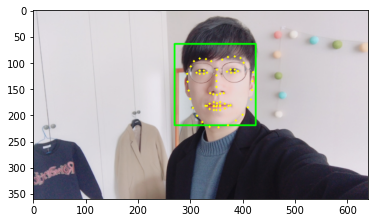

In [6]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 얼굴좌표확인

In [7]:
for dlib_rectangle, landmark in zip(bounding_box, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rectangle.width()//2
    w = dlib_rectangle.width()
    h = dlib_rectangle.height()
    print('x,y : %d,%d'%(x,y))
    print('w,h : %d,%d'%(w,h))

(350, 146)
x,y : 350,68
w,h : 156,156


### 스티커 이미지 읽기

In [8]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(156, 156, 3)


### 시작점설정

In [9]:
refined_x = x - (w//2)
refined_y = y
print('x, y : %d, %d'%(refined_x, refined_y))

x, y : 272, 68


### 스티커적용

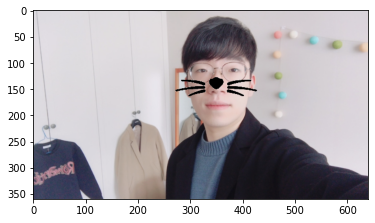

In [10]:
sticker_area = img_bgr[refined_y:(refined_y)+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:(refined_y)+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()